Este trabalho tem como objetivo realizar uma análise exploratória de dados (EDA), observando a valoração histórica de títulos públicos pré-fixados em 2022 

Espera-se poder capturar a formação de expectativas dos agentes econômicos ao longo do tempo e a atratividade dos investimentos em títulos públicos ao longo do tempo

Para isso, será utilizado os dados disponibilizados no site do tesouro nacional e aplicar-se-a técnicas de análise de Series Temporais e Estatistica Descritiva

---------------------------------------------------

Passo 1 - Importar as Bibliotecas Relevantes 

In [225]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data as wb 
import numpy as np 
import seaborn as sns
sns.set()

---------------------------------
Passo 2 - importar os dados

In [108]:
bond_1Y = pd.read_excel("C:/Users/emman/Desktop/Power Bi/Personal Projects/Bounds/LTN_2022.xls",
                         sheet_name = "LTN 010123", date_parser= ["Dia"], index_col= "Dia")["Taxa Compra Manhã"]
bond_2Y = pd.read_excel("C:/Users/emman/Desktop/Power Bi/Personal Projects/Bounds/LTN_2022.xls",
                         sheet_name = "LTN 010724", date_parser= ["Dia"], index_col= "Dia")["Taxa Compra Manhã"]
bond_3Y = pd.read_excel("C:/Users/emman/Desktop/Power Bi/Personal Projects/Bounds/LTN_2022.xls",
                         sheet_name = "LTN 010125", date_parser= ["Dia"], index_col= "Dia")["Taxa Compra Manhã"]
bond_4Y = pd.read_excel("C:/Users/emman/Desktop/Power Bi/Personal Projects/Bounds/LTN_2022.xls",
                         sheet_name = "LTN 010126", date_parser= ["Dia"], index_col= "Dia")["Taxa Compra Manhã"]
bond_7Y = pd.read_excel("C:/Users/emman/Desktop/Power Bi/Personal Projects/Bounds/LTN_2022.xls",
                         sheet_name = "LTN 010129", date_parser= ["Dia"], index_col= "Dia")["Taxa Compra Manhã"]

In [109]:
bond_agregate = pd.concat([bond_1Y,bond_2Y,bond_3Y,bond_4Y, bond_7Y], axis= 1).mul(100)
colunas = ["Título Venc 1Y", "Título Venc 2Y", "Título Venc 3Y", "Título Venc 4Y","Título Venc 7Y"]
bond_agregate.columns = colunas
bond_agregate

,Título Venc 1Y,Título Venc 2Y,Título Venc 3Y,Título Venc 4Y,Título Venc 7Y
03/01/2022,11.83,10.90,10.74,10.63,NaN
04/01/2022,11.78,11.04,10.93,10.87,NaN
05/01/2022,12.02,11.42,11.29,11.18,NaN
06/01/2022,12.07,11.65,11.52,11.40,NaN
07/01/2022,11.93,11.55,11.43,11.31,NaN
...,...,...,...,...,...
06/09/2022,13.72,12.36,11.86,11.72,11.80
08/09/2022,13.71,12.36,11.84,11.67,11.70
09/09/2022,13.73,12.39,11.81,11.59,11.62
12/09/2022,13.70,12.25,11.69,11.49,11.50


Nesta etapa, foram agrupados todos os títulos pela serie histórica de taxas de compra futura em um DataFrame consolidado

-----------------------------------------
Passo 3 - Checar e corrigir missing data 

In [110]:
bond_agregate.isna().sum()

Título Venc 1Y     0
Título Venc 2Y     0
Título Venc 3Y     0
Título Venc 4Y     0
Título Venc 7Y    35
dtype: int64

Vamos preencher os valores de missing com a média dos dados históricas do período para os títulos de vencimento em 7 anos

In [117]:
bond_agregate["Título Venc 7Y"] = bond_agregate["Título Venc 7Y"].fillna(bond_agregate["Título Venc 7Y"].loc["03/01/2022" : "03/03/2022"].mean())
bond_agregate

,Título Venc 1Y,Título Venc 2Y,Título Venc 3Y,Título Venc 4Y,Título Venc 7Y
03/01/2022,11.83,10.90,10.74,10.63,11.531429
04/01/2022,11.78,11.04,10.93,10.87,11.531429
05/01/2022,12.02,11.42,11.29,11.18,11.531429
06/01/2022,12.07,11.65,11.52,11.40,11.531429
07/01/2022,11.93,11.55,11.43,11.31,11.531429
...,...,...,...,...,...
06/09/2022,13.72,12.36,11.86,11.72,11.800000
08/09/2022,13.71,12.36,11.84,11.67,11.700000
09/09/2022,13.73,12.39,11.81,11.59,11.620000
12/09/2022,13.70,12.25,11.69,11.49,11.500000


In [118]:
bond_agregate.isna().sum()

Título Venc 1Y    0
Título Venc 2Y    0
Título Venc 3Y    0
Título Venc 4Y    0
Título Venc 7Y    0
dtype: int64

-------------------------------
Passo 4 - Analises

Para o início dos trabalhos, vamos validar as distribuições dos retornos comparativamente através de um box plot:

<AxesSubplot:>

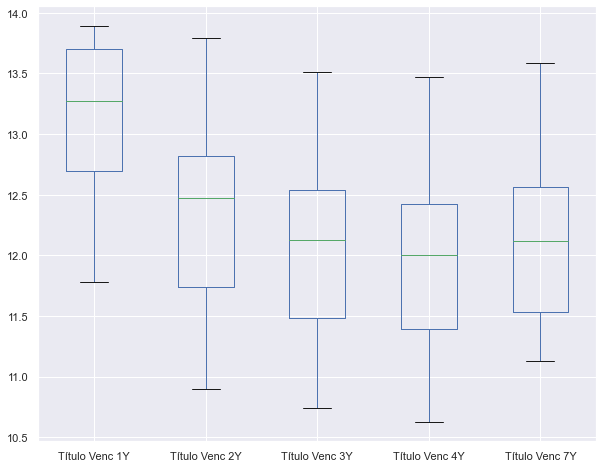

In [119]:
bond_agregate.plot(kind = "box", figsize = (10,8))

Já no prórpio boxplot é possivel ter uma noção da formação das expectativas dos agentes econômicos em torno das taxas de juros de curto,médio e longo prazo que vão ser atreladas aos títulos do tesouro.

Observe que a média das distribuição vai decaindo ao longo do tempo, ao passo que a variabilidade dos dados se mantem estável

In [120]:
bond_agregate.describe()

,Título Venc 1Y,Título Venc 2Y,Título Venc 3Y,Título Venc 4Y,Título Venc 7Y
count,176.00000,176.000000,176.000000,176.000000,176.000000
mean,13.09858,12.398977,12.106307,12.003295,12.163239
std,0.63375,0.653232,0.624605,0.631440,0.587333
min,11.78000,10.900000,10.740000,10.630000,11.130000
25%,12.69500,11.737500,11.487500,11.392500,11.531429
50%,13.27000,12.475000,12.130000,12.000000,12.115000
75%,13.70000,12.820000,12.540000,12.420000,12.562500
max,13.89000,13.790000,13.510000,13.470000,13.590000


Em um olhar mais detalhado para as estatísticas descritivas, pode-se observar que a o desvio padrão decai para os títulos com vencimento em sete anos, o que pode indicar a formação de expectativas consistentes de longo prazo sobre a taxa de juros.

Outro ponto importante é relativo à média das distribuições. Geralmente existe um prémio-risco em torno de títulos com maior maturidade em relação à títulos com maturidade menor,ou seja, os agentes esperam remunerações maiores quanto maior for o vencimento de um título, porém, ao analisar a média dos retornos dos títulos pré-fixados, nota-se um fenômeno único: o valor esperado fica estático na casa dos 12%

Esse fenômeno ocorre pelas políticas econômicas e fiscais utilizadas pelo Bacen para reverter os efeitos da crise e da inflação no país. Nesse contexto, os agentes esperam que as políticas vão surtir efeito e gerar melhores possibilidades de crédito no futuro, produzindo um efeito de inclinação negativa da curva de juros que logo mais será evidenciado no estudo

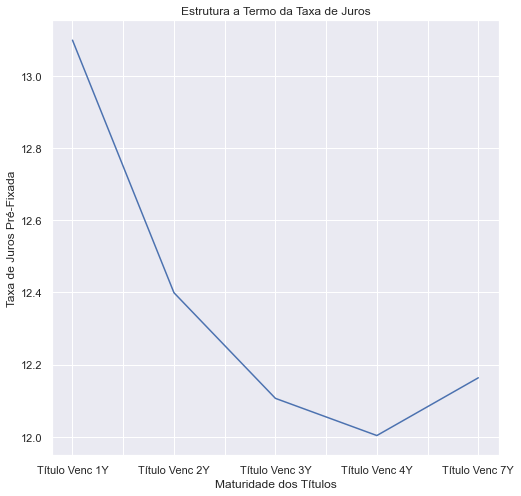

In [127]:
bond_agregate.mean().plot(figsize = (8,8), title = "Estrutura a Termo da Taxa de Juros")
plt.xlabel("Maturidade dos Títulos")
plt.ylabel("Taxa de Juros Pré-Fixada")
plt.show()

Observe como a Estrutura a Termo da Taxa de juros (ETTJ) foge total do padrão de uma situação normal. Tem-se um curva de juros negativamente inclinada, de modo que o agente econômico não exige retornos maiores no futuro pelo maior nível de maturação do título público

Pensando em uma oportunidades de investimento, a análise indica cautela ao continuar investindo em títulos pré-fixados ou renda fixa em geral, pois os agentes econômicos esperam uma redução das taxas de juros para os próximos anos. 

Dessa maneira para investidores que apenas estão olhando as oportunidades de curto prazo, isso pode indicar um risco de perda de rentaiblidade do portifólio

-------------------------------
Passo 5 - Comparação com benchmarks de mercado 

Vale a pena também comparar os retornos mensais médios dos títulos pré-fixados com o retorno de benchmarks da bolsa como o Ibovespa

Retornos médios dos títulos:

Text(0.5, 0, 'Periodo')

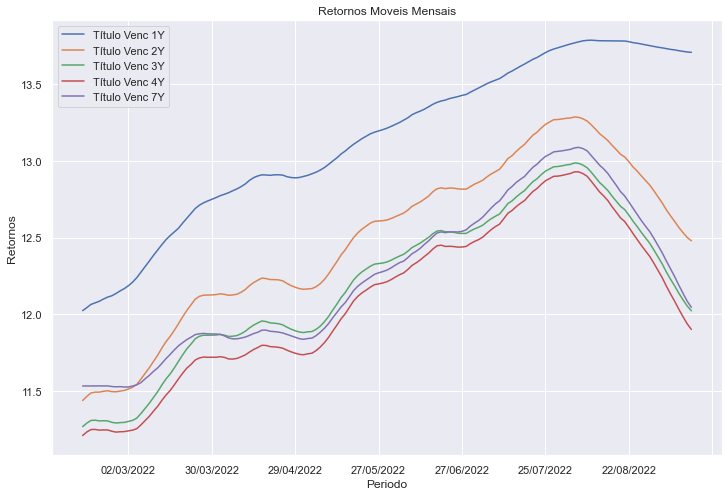

In [152]:
bond_return = bond_agregate.rolling(30).mean()
bond_return.plot(figsize = (12,8), title = "Retornos Moveis Mensais")
plt.ylabel("Retornos")
plt.xlabel("Periodo")

Observe que apesar de uma tendência de apreciação dos títulos públicos ao longo do ano, é perceptível uma deflexão da curva a partir do mês 08, sinalizando um risco ao investidor para os próximos períodos


-------------------------
Conclusões:

Pensando em otimização de portifólio e gestão de risco, o estudo demonstra que o Brasil vive um momento impar em relação ao comportamento da curva de juros, contrariando o que se espera  de um mercado de renda fixa saudável e normal. Foi descoberto que as taxas para títulos de curto prazo estão maiores que as taxas para títulos de longo prazo, sinalizando um desejo por linhas de crédito mais baratas no futuro.  

Ademais nota-se que uma reversão da tendência de crescimento dos retorno dos títulos públicos, o que corrobora com as percepções de longo prazo dos agentes econômicos. Isso pode sinalizar o início do fim da alta de renda fixa que foi observada desde 2020 até meados de 2022. 